# 1. 사용 패키지

In [27]:
from wordcloud import WordCloud

In [15]:
import pandas as pd

In [177]:
import shap

In [81]:
txt = '미성년자 지역 공급_자격 실거주율 대중교통 주차면수/총세대' + \
' 임대건물구분 전용면적 총세대수 단지내주차면수 전용면적별세대수' + \
' 임대보증금 임대료'

col = txt.split(' ')
data = [117, 32, 19, 2626, 1024, 1610, 3173, 473, 5612, 7703, 4129, 4062, 4321]
data = np.array(data)/10000

keywords = dict(pd.Series(data, col))

In [82]:
keywords

{'미성년자': 0.0117,
 '지역': 0.0032,
 '공급_자격': 0.0019,
 '실거주율': 0.2626,
 '대중교통': 0.1024,
 '주차면수/총세대': 0.161,
 '임대건물구분': 0.3173,
 '전용면적': 0.0473,
 '총세대수': 0.5612,
 '단지내주차면수': 0.7703,
 '전용면적별세대수': 0.4129,
 '임대보증금': 0.4062,
 '임대료': 0.4321}

In [15]:
keywords.headmap()

KeyboardInterrupt: 

In [170]:
wordcloud = WordCloud()
wordcloud = wordcloud.generate_from_frequencies(keywords)

from PIL import Image
black = np.array(Image.open('c:/test.jpg'))

font_path = 'C:/Windows/Fonts/H2GTRE.TTF'


wordcloud = WordCloud(
    font_path = font_path,
    background_color = 'white',
    width = 300,
    height = 400,
    max_words = 300,
    max_font_size = 300,
    mask = black
)
wordcloud = wordcloud.generate_from_frequencies(keywords)

plt.imshow(wordcloud)

In [171]:
from PIL import Image
black = np.array(Image.open('c:/test.jpg'))

In [174]:
font_path = 'C:/Windows/Fonts/H2GTRE.TTF'


wordcloud = WordCloud(
    font_path = font_path,
    background_color = 'white',
    width = 300,
    height = 400,
    max_words = 300,
    max_font_size = 300,
    mask = black
)
wordcloud = wordcloud.generate_from_frequencies(keywords)

In [16]:
plt.imshow(wordcloud)

NameError: name 'wordcloud' is not defined

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from pycaret.regression import *
from sklearn.model_selection import train_test_split as split

# 2. 데이터 불러오기

In [2]:
path = 'C:/Users/samsung/Desktop/수업자료/'


data = pd.read_csv(path + 'train.csv')
age_gender = pd.read_csv(path + 'age_gender_info.csv')

In [3]:
data.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수'],
      dtype='object')

In [4]:
data.columns = ['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '근처 지하철 수',
       '근처 버스 수', '단지내주차면수', '등록차량수']

In [5]:
data

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,근처 지하철 수,근처 버스 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947,C2532,239,아파트,강원도,국민임대,49.20,19,7.0,A,11346000,116090,0.0,1.0,166.0,146.0
2948,C2532,239,아파트,강원도,국민임대,51.08,34,7.0,A,14005000,142310,0.0,1.0,166.0,146.0
2949,C2532,239,아파트,강원도,국민임대,51.73,34,7.0,A,14005000,142310,0.0,1.0,166.0,146.0
2950,C2532,239,아파트,강원도,국민임대,51.96,114,7.0,A,14005000,142310,0.0,1.0,166.0,146.0


# 3. 데이터 오류 처리

### 1) 총 세대수 합계 오류

In [6]:
small_diff = ['C1925', 'C1312', 'C2013', 'C1424', 'C2520', 'C2319', 'C1850', 'C1068', 'C2644', 'C2156', 'C2453', 'C1910', 'C2139', 'C2508', 'C1695', 'C2556', 'C2362', 'C2568', 'C2245', 'C2549', 'C1584', 'C2298', 'C2225', 'C1218', 'C1970', 'C1732', 'C2433', 'C1894', 'C1156', 'C2142', 'C2186', 'C2411', 'C1812', 'C1030', 'C1749', 'C1349', 'C2043', 'C1229', 'C2363', 'C1414', 'C2174', 'C2404', 'C1683', 'C1038', 'C2456', 'C1266', 'C1267', 'C2189']
big_diff = ['C1490', 'C2497', 'C2620', 'C1344', 'C1024', 'C2470', 'C1206', 'C1740', 'C2405', 'C1804']
diff = small_diff + big_diff

for i in diff:
    target = data[data['단지코드']==i].copy()
    change = data[data['단지코드']==i].전용면적별세대수.sum()
    k = len(target)
    
    if k != 0:
        target['총세대수'] = change
        
        data[data['단지코드']==i] = target

### 2) 데이터 자체 오류

In [7]:
overlap_list = ['C2085', 'C1397', 'C2431', 'C1649', 'C1036']
mistake_list = ['C1095', 'C2051', 'C1218', 'C1894', 'C2483', 'C1502', 'C1988']

err_list = overlap_list + mistake_list

for i in err_list:
    idx = data[data['단지코드']==i].index
    data.drop(idx,inplace= True)

# 4. 결측치

### 1) 결측치 확인

In [8]:
data.loc[data.임대보증금=='-'].head(1)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,근처 지하철 수,근처 버스 수,단지내주차면수,등록차량수
2547,C1326,1934,아파트,부산광역시,국민임대,24.72,472,43.0,H,-,-,0.0,4.0,1670.0,1153.0


In [9]:
data.임대보증금[data.임대보증금.isnull()]

88      NaN
89      NaN
90      NaN
91      NaN
101     NaN
       ... 
2333    NaN
2334    NaN
2335    NaN
2336    NaN
2337    NaN
Name: 임대보증금, Length: 569, dtype: object

In [10]:
data.loc[data.임대보증금=='-', '임대보증금'] = np.nan
data['임대보증금'] = data['임대보증금'].astype(float)

data.loc[data.임대료=='-', '임대료'] = np.nan
data['임대료'] = data['임대료'].astype(float)

In [11]:
data.isna().sum()[data.isna().sum()!=0 ]

임대보증금       581
임대료         584
근처 지하철 수    207
dtype: int64

### 2) 결측치 처리

#### -지하철역 수

In [12]:
data['근처 지하철 수'] = data['근처 지하철 수'].fillna(0)

#### -임대료 및 임대보증금

In [13]:
loc = data.지역.unique()
temp_list = ['임대료', '임대보증금']

In [14]:
loc

array(['경상남도', '대전광역시', '경기도', '전라북도', '강원도', '광주광역시', '충청남도', '부산광역시',
       '제주특별자치도', '울산광역시', '충청북도', '전라남도', '경상북도', '대구광역시', '서울특별시',
       '세종특별자치시'], dtype=object)

In [195]:
for l in loc:
    for temp in temp_list:
        data.loc[data['지역'] == l, temp] = data[temp].fillna(data[data['지역'] == l][temp].mean())

In [196]:
data.isna().sum()

단지코드        0
총세대수        0
임대건물구분      0
지역          0
공급유형        0
전용면적        0
전용면적별세대수    0
공가수         0
자격유형        0
임대보증금       0
임대료         0
근처 지하철 수    0
근처 버스 수     0
단지내주차면수     0
등록차량수       0
dtype: int64

# 5. 데이터 전처리

# 



# ㅡㅡㅡㅡㅡㅡㅡ사용자정의함수ㅡㅡㅡㅡㅡㅡㅡ






# 

### 1) categorical 값들 펼치기

#### -no underbar

In [197]:
def reshape_cat_features(data, cast_col, value_col):
    res = data.drop_duplicates(['단지코드', cast_col]).assign(counter=1).pivot(index='단지코드', columns=cast_col, values=value_col).fillna(0)
    res.columns.name = None
    res = res.rename(columns={col:col for col in res.columns})
    return res

#### -underbar

In [198]:
def reshape_cat_features_plus_underbar(data, cast_col, value_col):
    res = data.drop_duplicates(['단지코드', cast_col]).assign(counter=1).pivot(index='단지코드', columns=cast_col, values=value_col).fillna(0)
    res.columns.name = None
    res = res.rename(columns={col:cast_col+'_'+ str(col) for col in res.columns})
    return res

### 2) 대중교통 값 조정

In [199]:
def transportation_level(x):
  result = 0

  if x <= 0 :
    result = 5
  elif x <= 2:
    result = 4
  elif x <= 4 :
    result = 3
  elif x <= 6 :
    result = 2
  else:
    result = 1
    
  return result

# cf)원래 있던 값을 drop 하지 않았을 때 더 성능이 잘 나옴

# 



# ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ






# 

### 1) 공급, 자격유형

#### -공급유형 자격유형 병합

In [200]:
# 공급유형과 자격유형 어느정도 관련성이 예측됨

In [201]:
data['공급_자격'] = data.apply(lambda r : r['공급유형'] + '_' + r['자격유형'], axis=1)

data.head(3)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,근처 지하철 수,근처 버스 수,단지내주차면수,등록차량수,공급_자격
8,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000.0,82940.0,0.0,3.0,624.0,205.0,국민임대_A
9,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000.0,107130.0,0.0,3.0,624.0,205.0,국민임대_A
10,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,A,12672000.0,107130.0,0.0,3.0,624.0,205.0,국민임대_A


### 2) 전용면적

#### -소수점 제거 및 짝수화

In [202]:
# 성능 그래프도 그려보기!

In [203]:
data['전용면적'] = data['전용면적']//2*2  ##현재는 2*2일 때 가장 성능이 좋았었다. 

data.head(3)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,근처 지하철 수,근처 버스 수,단지내주차면수,등록차량수,공급_자격
8,C2515,545,아파트,경상남도,국민임대,32.0,276,17.0,A,9216000.0,82940.0,0.0,3.0,624.0,205.0,국민임대_A
9,C2515,545,아파트,경상남도,국민임대,38.0,60,17.0,A,12672000.0,107130.0,0.0,3.0,624.0,205.0,국민임대_A
10,C2515,545,아파트,경상남도,국민임대,38.0,20,17.0,A,12672000.0,107130.0,0.0,3.0,624.0,205.0,국민임대_A


### 3) 미성년자 변수 생성

In [204]:
minors = ['10대미만(여자)','10대미만(남자)','10대(여자)','10대(남자)']
age_gender['미성년자'] = age_gender[minors].sum(axis = 1)

In [205]:
data = data.merge(age_gender, left_on = ['지역'], right_on = ['지역'], how = 'left')

In [206]:
data.corr().등록차량수

총세대수         0.321826
전용면적         0.104405
전용면적별세대수     0.254948
공가수          0.130775
임대보증금        0.271611
임대료          0.387280
근처 지하철 수    -0.079587
근처 버스 수      0.110977
단지내주차면수      0.856549
등록차량수        1.000000
10대미만(여자)    0.268142
10대미만(남자)    0.274423
10대(여자)      0.017406
10대(남자)     -0.013654
20대(여자)      0.008058
20대(남자)     -0.138710
30대(여자)      0.384424
30대(남자)      0.369807
40대(여자)      0.186006
40대(남자)      0.320559
50대(여자)     -0.236608
50대(남자)     -0.266656
60대(여자)     -0.191946
60대(남자)     -0.243727
70대(여자)     -0.190950
70대(남자)     -0.147894
80대(여자)     -0.224072
80대(남자)     -0.151342
90대(여자)     -0.180396
90대(남자)     -0.054103
100대(여자)     0.134927
100대(남자)     0.006264
미성년자         0.113158
Name: 등록차량수, dtype: float64

In [207]:
data

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,근처 지하철 수,근처 버스 수,단지내주차면수,등록차량수,공급_자격,10대미만(여자),10대미만(남자),10대(여자),10대(남자),20대(여자),20대(남자),30대(여자),30대(남자),40대(여자),40대(남자),50대(여자),50대(남자),60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자),미성년자
0,C2515,545,아파트,경상남도,국민임대,32.0,276,17.0,A,9216000.0,82940.0,0.0,3.0,624.0,205.0,국민임대_A,0.027400,0.026902,0.053257,0.055568,0.064920,0.070618,0.056414,0.057550,0.077092,0.067600,0.086873,0.072570,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010,0.163127
1,C2515,545,아파트,경상남도,국민임대,38.0,60,17.0,A,12672000.0,107130.0,0.0,3.0,624.0,205.0,국민임대_A,0.027400,0.026902,0.053257,0.055568,0.064920,0.070618,0.056414,0.057550,0.077092,0.067600,0.086873,0.072570,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010,0.163127
2,C2515,545,아파트,경상남도,국민임대,38.0,20,17.0,A,12672000.0,107130.0,0.0,3.0,624.0,205.0,국민임대_A,0.027400,0.026902,0.053257,0.055568,0.064920,0.070618,0.056414,0.057550,0.077092,0.067600,0.086873,0.072570,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010,0.163127
3,C2515,545,아파트,경상남도,국민임대,46.0,38,17.0,A,18433000.0,149760.0,0.0,3.0,624.0,205.0,국민임대_A,0.027400,0.026902,0.053257,0.055568,0.064920,0.070618,0.056414,0.057550,0.077092,0.067600,0.086873,0.072570,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010,0.163127
4,C2515,545,아파트,경상남도,국민임대,46.0,19,17.0,A,18433000.0,149760.0,0.0,3.0,624.0,205.0,국민임대_A,0.027400,0.026902,0.053257,0.055568,0.064920,0.070618,0.056414,0.057550,0.077092,0.067600,0.086873,0.072570,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010,0.163127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2864,C2532,239,아파트,강원도,국민임대,48.0,19,7.0,A,11346000.0,116090.0,0.0,1.0,166.0,146.0,국민임대_A,0.028888,0.030682,0.051287,0.052712,0.060374,0.063157,0.059821,0.054321,0.076201,0.068002,0.087266,0.072177,0.088423,0.070014,0.047732,0.032760,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017,0.163568
2865,C2532,239,아파트,강원도,국민임대,50.0,34,7.0,A,14005000.0,142310.0,0.0,1.0,166.0,146.0,국민임대_A,0.028888,0.030682,0.051287,0.052712,0.060374,0.063157,0.059821,0.054321,0.076201,0.068002,0.087266,0.072177,0.088423,0.070014,0.047732,0.032760,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017,0.163568
2866,C2532,239,아파트,강원도,국민임대,50.0,34,7.0,A,14005000.0,142310.0,0.0,1.0,166.0,146.0,국민임대_A,0.028888,0.030682,0.051287,0.052712,0.060374,0.063157,0.059821,0.054321,0.076201,0.068002,0.087266,0.072177,0.088423,0.070014,0.047732,0.032760,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017,0.163568
2867,C2532,239,아파트,강원도,국민임대,50.0,114,7.0,A,14005000.0,142310.0,0.0,1.0,166.0,146.0,국민임대_A,0.028888,0.030682,0.051287,0.052712,0.060374,0.063157,0.059821,0.054321,0.076201,0.068002,0.087266,0.072177,0.088423,0.070014,0.047732,0.032760,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017,0.163568


### 5) 데이터 정리

#### -중복행 제거

In [208]:
data = data.drop_duplicates()

In [209]:
data.shape

(2442, 39)

#### -변수 선택

In [210]:
unique_cols = ['총세대수', '지역', '공가수', '미성년자', 
               '근처 지하철 수',
               '근처 버스 수',
               '단지내주차면수', '등록차량수']

data_agg = data.set_index('단지코드')[unique_cols].drop_duplicates()

In [211]:
data_agg.shape

(411, 8)

### 6)데이터 병합

#### -단지별 mean값으로 처리

In [212]:
dm = data.groupby(['단지코드']).mean()


data_agg['전용면적별세대수 평균'] = dm['전용면적별세대수']

data_agg['임대보증금 평균'] = dm['임대보증금']

data_agg['임대료 평균'] = dm['임대료']

#### -단지별 고유값 개수로 처리

In [213]:
dc = data.groupby(['단지코드']).nunique(dropna=False)

data_agg['임대건물구분'] = dc['임대건물구분']

### 7)데이터 병합

#### -값이 411 -> 유일한 값

In [214]:
count = data.groupby(['단지코드']).nunique(dropna=False).sum(axis=0)
count

총세대수          411
임대건물구분        444
지역            411
공급유형          475
전용면적         1332
전용면적별세대수     2155
공가수           411
자격유형          498
임대보증금        1234
임대료          1248
근처 지하철 수      411
근처 버스 수       411
단지내주차면수       411
등록차량수         411
공급_자격         502
10대미만(여자)     411
10대미만(남자)     411
10대(여자)       411
10대(남자)       411
20대(여자)       411
20대(남자)       411
30대(여자)       411
30대(남자)       411
40대(여자)       411
40대(남자)       411
50대(여자)       411
50대(남자)       411
60대(여자)       411
60대(남자)       411
70대(여자)       411
70대(남자)       411
80대(여자)       411
80대(남자)       411
90대(여자)       411
90대(남자)       411
100대(여자)      411
100대(남자)      411
미성년자          411
dtype: int64

In [215]:
count[count != 411]

임대건물구분       444
공급유형         475
전용면적        1332
전용면적별세대수    2155
자격유형         498
임대보증금       1234
임대료         1248
공급_자격        502
dtype: int64

In [216]:
data

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,근처 지하철 수,근처 버스 수,단지내주차면수,등록차량수,공급_자격,10대미만(여자),10대미만(남자),10대(여자),10대(남자),20대(여자),20대(남자),30대(여자),30대(남자),40대(여자),40대(남자),50대(여자),50대(남자),60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자),미성년자
0,C2515,545,아파트,경상남도,국민임대,32.0,276,17.0,A,9216000.0,82940.0,0.0,3.0,624.0,205.0,국민임대_A,0.027400,0.026902,0.053257,0.055568,0.064920,0.070618,0.056414,0.057550,0.077092,0.067600,0.086873,0.072570,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010,0.163127
1,C2515,545,아파트,경상남도,국민임대,38.0,60,17.0,A,12672000.0,107130.0,0.0,3.0,624.0,205.0,국민임대_A,0.027400,0.026902,0.053257,0.055568,0.064920,0.070618,0.056414,0.057550,0.077092,0.067600,0.086873,0.072570,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010,0.163127
2,C2515,545,아파트,경상남도,국민임대,38.0,20,17.0,A,12672000.0,107130.0,0.0,3.0,624.0,205.0,국민임대_A,0.027400,0.026902,0.053257,0.055568,0.064920,0.070618,0.056414,0.057550,0.077092,0.067600,0.086873,0.072570,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010,0.163127
3,C2515,545,아파트,경상남도,국민임대,46.0,38,17.0,A,18433000.0,149760.0,0.0,3.0,624.0,205.0,국민임대_A,0.027400,0.026902,0.053257,0.055568,0.064920,0.070618,0.056414,0.057550,0.077092,0.067600,0.086873,0.072570,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010,0.163127
4,C2515,545,아파트,경상남도,국민임대,46.0,19,17.0,A,18433000.0,149760.0,0.0,3.0,624.0,205.0,국민임대_A,0.027400,0.026902,0.053257,0.055568,0.064920,0.070618,0.056414,0.057550,0.077092,0.067600,0.086873,0.072570,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010,0.163127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2863,C2532,239,아파트,강원도,국민임대,46.0,19,7.0,A,11346000.0,116090.0,0.0,1.0,166.0,146.0,국민임대_A,0.028888,0.030682,0.051287,0.052712,0.060374,0.063157,0.059821,0.054321,0.076201,0.068002,0.087266,0.072177,0.088423,0.070014,0.047732,0.032760,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017,0.163568
2864,C2532,239,아파트,강원도,국민임대,48.0,19,7.0,A,11346000.0,116090.0,0.0,1.0,166.0,146.0,국민임대_A,0.028888,0.030682,0.051287,0.052712,0.060374,0.063157,0.059821,0.054321,0.076201,0.068002,0.087266,0.072177,0.088423,0.070014,0.047732,0.032760,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017,0.163568
2865,C2532,239,아파트,강원도,국민임대,50.0,34,7.0,A,14005000.0,142310.0,0.0,1.0,166.0,146.0,국민임대_A,0.028888,0.030682,0.051287,0.052712,0.060374,0.063157,0.059821,0.054321,0.076201,0.068002,0.087266,0.072177,0.088423,0.070014,0.047732,0.032760,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017,0.163568
2867,C2532,239,아파트,강원도,국민임대,50.0,114,7.0,A,14005000.0,142310.0,0.0,1.0,166.0,146.0,국민임대_A,0.028888,0.030682,0.051287,0.052712,0.060374,0.063157,0.059821,0.054321,0.076201,0.068002,0.087266,0.072177,0.088423,0.070014,0.047732,0.032760,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017,0.163568


In [217]:
data_agg

,총세대수,지역,공가수,미성년자,근처 지하철 수,근처 버스 수,단지내주차면수,등록차량수,전용면적별세대수 평균,임대보증금 평균,임대료 평균,임대건물구분
단지코드,,,,,,,,,,,,
C2515,545,경상남도,17.0,0.163127,0.0,3.0,624.0,205.0,77.857143,1.678714e+07,139557.142857,1
C1407,1216,대전광역시,13.0,0.140571,1.0,1.0,1285.0,1064.0,114.250000,2.598438e+07,165956.250000,1
C1945,755,경기도,6.0,0.184072,1.0,3.0,734.0,730.0,127.000000,2.406060e+07,200914.000000,1
C1470,696,전라북도,14.0,0.176920,0.0,2.0,645.0,553.0,174.000000,1.772275e+07,120150.000000,1
C1898,566,전라북도,9.0,0.176920,0.0,6.0,517.0,415.0,94.333333,1.742233e+07,119148.333333,1
C1244,1722,경기도,10.0,0.184072,0.0,10.0,1483.0,1804.0,142.818182,4.033873e+07,276856.363636,1
C1171,624,대전광역시,13.0,0.140571,0.0,5.0,634.0,700.0,54.909091,3.116336e+07,174081.818182,1
C2073,361,강원도,13.0,0.163568,0.0,5.0,288.0,301.0,60.166667,1.622033e+07,198050.000000,1
C2513,754,광주광역시,15.0,0.166665,0.0,6.0,530.0,820.0,251.333333,3.244300e+07,192250.000000,1


#### -값이 411이 아닌 column에 대해서 값을 펼쳐줌

In [218]:
full_data = pd.concat([data_agg.drop(columns=['지역']), reshape_cat_features(data=data, cast_col='공급_자격', value_col='counter'),
                        reshape_cat_features(data=data, cast_col='지역', value_col='counter'),
                       reshape_cat_features_plus_underbar(data=data, cast_col='전용면적', value_col='counter')
                       ], axis=1)

full_data['실거주율'] = (data_agg['총세대수'] - data_agg['공가수'])/data_agg['총세대수']

transport = ['근처 지하철 수', '근처 버스 수']
full_data['대중교통현황'] = data_agg[transport].sum(axis=1)

full_data['대중교통현황'] = full_data['대중교통현황'].apply(transportation_level) 

In [219]:
## log취하기
log_col = ['총세대수', '단지내주차면수', '대중교통현황', '전용면적별세대수 평균', '임대보증금 평균', '임대료 평균']
for col in log_col:
    full_data[col+'log'] = np.log1p(full_data[col])

full_data['주차면수/총세대'] = full_data['단지내주차면수'] / full_data['총세대수']
full_data['단지내주차면수/100'] = full_data['단지내주차면수']/100

In [220]:
full_data.columns.tolist()

['총세대수',
 '공가수',
 '미성년자',
 '근처 지하철 수',
 '근처 버스 수',
 '단지내주차면수',
 '등록차량수',
 '전용면적별세대수 평균',
 '임대보증금 평균',
 '임대료 평균',
 '임대건물구분',
 '공공분양_D',
 '공공임대(10년)_A',
 '공공임대(50년)_A',
 '공공임대(5년)_A',
 '공공임대(분납)_A',
 '국민임대_A',
 '국민임대_B',
 '국민임대_E',
 '국민임대_G',
 '국민임대_H',
 '영구임대_A',
 '영구임대_C',
 '영구임대_E',
 '영구임대_F',
 '영구임대_I',
 '임대상가_D',
 '장기전세_A',
 '행복주택_J',
 '행복주택_K',
 '행복주택_L',
 '행복주택_M',
 '행복주택_N',
 '행복주택_O',
 '강원도',
 '경기도',
 '경상남도',
 '경상북도',
 '광주광역시',
 '대구광역시',
 '대전광역시',
 '부산광역시',
 '서울특별시',
 '세종특별자치시',
 '울산광역시',
 '전라남도',
 '전라북도',
 '제주특별자치도',
 '충청남도',
 '충청북도',
 '전용면적_12.0',
 '전용면적_14.0',
 '전용면적_16.0',
 '전용면적_18.0',
 '전용면적_20.0',
 '전용면적_22.0',
 '전용면적_24.0',
 '전용면적_26.0',
 '전용면적_28.0',
 '전용면적_30.0',
 '전용면적_32.0',
 '전용면적_34.0',
 '전용면적_36.0',
 '전용면적_38.0',
 '전용면적_40.0',
 '전용면적_42.0',
 '전용면적_44.0',
 '전용면적_46.0',
 '전용면적_48.0',
 '전용면적_50.0',
 '전용면적_52.0',
 '전용면적_54.0',
 '전용면적_56.0',
 '전용면적_58.0',
 '전용면적_60.0',
 '전용면적_62.0',
 '전용면적_66.0',
 '전용면적_72.0',
 '전용면적_74.0',
 '전용면적_82.0',
 '전용면적_84.0',
 '전용면적_108.0',
 '

In [221]:
dict(full_data.corr().등록차량수.sort_values())

{'임대건물구분': -0.317346168630719,
 '임대상가_D': -0.31734616863071896,
 '영구임대_C': -0.3060947840070773,
 '전용면적_30.0': -0.2820507678385235,
 '전용면적_16.0': -0.19111246920382713,
 '전용면적_18.0': -0.19031637757879266,
 '전용면적_22.0': -0.18777685340099906,
 '전용면적_14.0': -0.17896855019064276,
 '전용면적_26.0': -0.1760061842394911,
 '충청남도': -0.15715824682849597,
 '전용면적_34.0': -0.15478899055828424,
 '행복주택_J': -0.1487833938791158,
 '강원도': -0.1459201930295862,
 '전용면적_36.0': -0.1456261619226784,
 '전용면적_240.0': -0.13856161060643862,
 '전용면적_126.0': -0.12636171959573786,
 '전용면적_136.0': -0.11882267766044569,
 '대중교통현황': -0.1130717454342237,
 '공공임대(50년)_A': -0.10970685711562825,
 '행복주택_L': -0.10968271126116824,
 '전용면적_62.0': -0.10875119205203941,
 '전용면적_42.0': -0.1067494843762352,
 '대중교통현황log': -0.10242472873941194,
 '전용면적_54.0': -0.10061606679618089,
 '전용면적_582.0': -0.09740805082043931,
 '전용면적_32.0': -0.09440020868423463,
 '제주특별자치도': -0.09375618552029413,
 '경상남도': -0.09348143613060209,
 '전용면적_52.0': -0.085529040521828

In [222]:
data_agg.columns

Index(['총세대수', '지역', '공가수', '미성년자', '근처 지하철 수', '근처 버스 수', '단지내주차면수', '등록차량수',
       '전용면적별세대수 평균', '임대보증금 평균', '임대료 평균', '임대건물구분'],
      dtype='object')

In [223]:
full_data.columns.tolist()

['총세대수',
 '공가수',
 '미성년자',
 '근처 지하철 수',
 '근처 버스 수',
 '단지내주차면수',
 '등록차량수',
 '전용면적별세대수 평균',
 '임대보증금 평균',
 '임대료 평균',
 '임대건물구분',
 '공공분양_D',
 '공공임대(10년)_A',
 '공공임대(50년)_A',
 '공공임대(5년)_A',
 '공공임대(분납)_A',
 '국민임대_A',
 '국민임대_B',
 '국민임대_E',
 '국민임대_G',
 '국민임대_H',
 '영구임대_A',
 '영구임대_C',
 '영구임대_E',
 '영구임대_F',
 '영구임대_I',
 '임대상가_D',
 '장기전세_A',
 '행복주택_J',
 '행복주택_K',
 '행복주택_L',
 '행복주택_M',
 '행복주택_N',
 '행복주택_O',
 '강원도',
 '경기도',
 '경상남도',
 '경상북도',
 '광주광역시',
 '대구광역시',
 '대전광역시',
 '부산광역시',
 '서울특별시',
 '세종특별자치시',
 '울산광역시',
 '전라남도',
 '전라북도',
 '제주특별자치도',
 '충청남도',
 '충청북도',
 '전용면적_12.0',
 '전용면적_14.0',
 '전용면적_16.0',
 '전용면적_18.0',
 '전용면적_20.0',
 '전용면적_22.0',
 '전용면적_24.0',
 '전용면적_26.0',
 '전용면적_28.0',
 '전용면적_30.0',
 '전용면적_32.0',
 '전용면적_34.0',
 '전용면적_36.0',
 '전용면적_38.0',
 '전용면적_40.0',
 '전용면적_42.0',
 '전용면적_44.0',
 '전용면적_46.0',
 '전용면적_48.0',
 '전용면적_50.0',
 '전용면적_52.0',
 '전용면적_54.0',
 '전용면적_56.0',
 '전용면적_58.0',
 '전용면적_60.0',
 '전용면적_62.0',
 '전용면적_66.0',
 '전용면적_72.0',
 '전용면적_74.0',
 '전용면적_82.0',
 '전용면적_84.0',
 '전용면적_108.0',
 '

In [224]:
col = ['총세대수', '공가수','근처 지하철 수','근처 버스 수',  '단지내주차면수',
       '대중교통현황', '전용면적별세대수 평균', '임대보증금 평균', '임대료 평균',
      '단지내주차면수/100']

full_data = full_data.drop(col,axis=1)

In [225]:
full_data.corr()

,미성년자,등록차량수,임대건물구분,공공분양_D,공공임대(10년)_A,공공임대(50년)_A,공공임대(5년)_A,공공임대(분납)_A,국민임대_A,국민임대_B,국민임대_E,국민임대_G,국민임대_H,영구임대_A,영구임대_C,영구임대_E,영구임대_F,영구임대_I,임대상가_D,장기전세_A,행복주택_J,행복주택_K,행복주택_L,행복주택_M,행복주택_N,행복주택_O,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,부산광역시,서울특별시,세종특별자치시,울산광역시,전라남도,전라북도,제주특별자치도,충청남도,충청북도,전용면적_12.0,전용면적_14.0,전용면적_16.0,전용면적_18.0,전용면적_20.0,전용면적_22.0,전용면적_24.0,전용면적_26.0,전용면적_28.0,전용면적_30.0,전용면적_32.0,전용면적_34.0,전용면적_36.0,전용면적_38.0,전용면적_40.0,전용면적_42.0,전용면적_44.0,전용면적_46.0,전용면적_48.0,전용면적_50.0,전용면적_52.0,전용면적_54.0,전용면적_56.0,전용면적_58.0,전용면적_60.0,전용면적_62.0,전용면적_66.0,전용면적_72.0,전용면적_74.0,전용면적_82.0,전용면적_84.0,전용면적_108.0,전용면적_126.0,전용면적_136.0,전용면적_240.0,전용면적_248.0,전용면적_316.0,전용면적_400.0,전용면적_404.0,전용면적_406.0,전용면적_582.0,실거주율,총세대수log,단지내주차면수log,대중교통현황log,전용면적별세대수 평균log,임대보증금 평균log,임대료 평균log,주차면수/총세대
미성년자,1.000000,-0.011700,-0.185384,-0.054156,-0.060389,-0.078422,-0.054156,-0.159491,0.140395,-0.009419,0.035283,-0.053847,0.096573,0.033136,-0.202159,0.008189,-0.109194,-0.025051,-0.185384,-0.171123,-0.020939,0.031397,-0.002375,-0.001795,0.043167,-0.001795,-0.051010,0.340060,-0.069284,0.127278,-0.009053,-0.401513,-0.279069,-0.562687,-0.421744,0.032820,-0.035994,0.218062,0.088252,0.206011,0.152245,0.271758,0.034152,-0.184303,-0.021681,-0.179280,-0.166753,-0.139170,-0.020363,-0.056860,-0.152118,-0.201394,-0.111619,0.001536,0.084198,-0.057459,-0.105766,0.002971,-0.033296,0.159871,0.010878,0.036773,-0.092524,-0.111275,0.018903,-0.045600,-0.109194,-0.018077,-0.066868,-0.067300,-0.160286,-0.008893,-0.084978,-0.054156,-0.041321,-0.008027,-0.106139,-0.083602,-0.008893,-0.109194,-0.109194,-0.109194,-0.195895,-0.059804,-0.201532,-0.074703,0.059955,-0.188118,-0.145478,-0.201643,0.050848
등록차량수,-0.011700,1.000000,-0.317346,0.223788,0.403904,-0.109707,0.041248,0.153429,0.004439,0.001113,0.029610,0.001390,0.157725,0.025397,-0.306095,-0.070798,-0.026246,0.092403,-0.317346,0.010313,-0.148783,-0.072476,-0.109683,-0.018959,0.009769,-0.018959,-0.145920,0.206231,-0.093481,0.018885,0.095863,0.111688,0.054490,-0.059415,0.021480,0.269744,-0.067228,-0.047152,-0.054190,-0.093756,-0.157158,-0.008560,-0.064211,-0.178969,-0.191112,-0.190316,-0.058783,-0.187777,-0.017490,-0.176006,-0.023961,-0.282051,-0.094400,-0.154789,-0.145626,-0.027699,-0.071865,-0.106749,-0.066165,0.108031,-0.071501,0.117936,-0.085529,-0.100616,0.181349,0.239522,-0.050150,-0.108751,0.204018,-0.085401,0.282514,-0.056797,0.319959,-0.059609,-0.126362,-0.118823,-0.138562,-0.082774,-0.064083,-0.032126,-0.050150,-0.026246,-0.097408,0.262639,0.561252,0.770326,-0.102425,0.412944,0.406279,0.432140,0.161043
임대건물구분,-0.185384,-0.317346,1.000000,-0.014592,-0.088732,0.117433,-0.014592,-0.020662,-0.422473,-0.025336,-0.053400,-0.020662,-0.085855,-0.014592,0.953620,0.079847,0.167146,-0.065050,1.000000,-0.014592,-0.061374,-0.032789,-0.035963,-0.014592,-0.025336,-0.014592,0.032196,-0.149753,0.100036,-0.068563,-0.073580,-0.063234,0.149569,0.224490,-0.035963,-0.025336,-0.038893,-0.073580,-0.068563,0.043235,0.148151,-0.082910,0.167146,0.561249,0.070340,0.586939,0.299412,0.505553,0.133482,0.479330,0.214788,0.934103,0.300896,0.376301,0.009036,-0.007216,0.202397,0.168704,0.001941,-0.320688,0.125691,-0.149643,0.244319,0.355875,-0.014592,-0.175294,0.167146,0.335523,-0.020662,0.335523,0.097787,0.167146,-0.073580,0.167146,0.375587,0.335523,0.411943,0.236669,0.167146,0.167146,0.167146,0.167146,0.375587,0.214881,0.169073,-0.363127,-0.082888,-0.026078,-0.210892,-0.089886,-0.164137
공공분양_D,-0.054156,0.223788,-0.014592,1.000000,0.164452,-0.008190,-0.002439,0.706244,-0.070615,-0.004235,-0.008926,-0.003454,-0.014350,-0.002439,-0.015302,-0.004235,-0.002439,-0.010873,-0.014592,-0.002439,-0.010259,-0.005481,-0.006011,-0.002439,-0.004235,-0.002439,-0.015534,-0.025031,-0.019002,-0.011460,-0.012299,-0.010569,0.194058,-0.012569,-0.006011,-0.004235,-0.006501,-0.012299,-0.011460,-0.009274,-0.010873,-0.013858,-0.002439,-0.008190,-0.012834,-0.008565,-0.012569,-0.010569,-0.009612,-0.028005,-0.015763,-0.014592,-0.018380,-0.006501,-0.046468,-0.028745,-0.008926,-

In [226]:
full_data.corr().등록차량수['전용면적_12.0':'전용면적_582.0'].mean()

-0.04730553454258831

# 6. 모델 학습

### 1)주차면수대비등록확률

#### -등록차량수 -> 주차면수대비등록확률

In [227]:
per_data = full_data.copy()

In [228]:
##target 값 비율로 바꾸고 필요 없는 특성 제거 (이를 target encoding 으로 칭하는 듯 함..?)
per_data['주차면수대비등록확률'] = per_data['등록차량수'] / per_data['단지내주차면수']
per_data = per_data.drop(columns=['등록차량수'])

# train_data = train_data.drop(columns=['실거주가구'])
# test_data = test_data.drop(columns=['실거주가구'])

# train_data = train_data.drop(columns=['단지내주차면수'])
# test_data = test_data.drop(columns=['단지내주차면수'])

KeyError: '단지내주차면수'

In [229]:
per_data.head()

,미성년자,등록차량수,임대건물구분,공공분양_D,공공임대(10년)_A,공공임대(50년)_A,공공임대(5년)_A,공공임대(분납)_A,국민임대_A,국민임대_B,국민임대_E,국민임대_G,국민임대_H,영구임대_A,영구임대_C,영구임대_E,영구임대_F,영구임대_I,임대상가_D,장기전세_A,행복주택_J,행복주택_K,행복주택_L,행복주택_M,행복주택_N,행복주택_O,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,부산광역시,서울특별시,세종특별자치시,울산광역시,전라남도,전라북도,제주특별자치도,충청남도,충청북도,전용면적_12.0,전용면적_14.0,전용면적_16.0,전용면적_18.0,전용면적_20.0,전용면적_22.0,전용면적_24.0,전용면적_26.0,전용면적_28.0,전용면적_30.0,전용면적_32.0,전용면적_34.0,전용면적_36.0,전용면적_38.0,전용면적_40.0,전용면적_42.0,전용면적_44.0,전용면적_46.0,전용면적_48.0,전용면적_50.0,전용면적_52.0,전용면적_54.0,전용면적_56.0,전용면적_58.0,전용면적_60.0,전용면적_62.0,전용면적_66.0,전용면적_72.0,전용면적_74.0,전용면적_82.0,전용면적_84.0,전용면적_108.0,전용면적_126.0,전용면적_136.0,전용면적_240.0,전용면적_248.0,전용면적_316.0,전용면적_400.0,전용면적_404.0,전용면적_406.0,전용면적_582.0,실거주율,총세대수log,단지내주차면수log,대중교통현황log,전용면적별세대수 평균log,임대보증금 평균log,임대료 평균log,주차면수/총세대
C2515,0.163127,205.0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.968807,6.302619,6.437752,1.386294,4.367638,16.636124,11.846237,1.144954
C1407,0.140571,1064.0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.989309,7.104144,7.159292,1.609438,4.747104,17.073006,12.019486,1.056743
C1945,0.184072,730.0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.992053,6.628041,6.599870,1.386294,4.852030,16.996086,12.210637,0.972185
C1470,0.176920,553.0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.979885,6.546785,6.470800,1.609438,5.164786,16.690360,11.696505,0.926724
C1898,0.176920,415.0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.984099,6.340359,6.249975,1.098612,4.557380,16.673264,11.688133,0.913428


In [106]:
a = full_data.corr().등록차량수.sort_values()
a[a<0.1][a>-0.1]

전용면적_582.0   -0.097408
전용면적_32.0    -0.094400
제주특별자치도      -0.093756
경상남도         -0.093481
전용면적_52.0    -0.085529
전용면적_72.0    -0.085401
전용면적_248.0   -0.082774
행복주택_K       -0.072476
전용면적_40.0    -0.071865
전용면적_48.0    -0.071501
영구임대_E       -0.070798
울산광역시        -0.067228
전용면적_44.0    -0.066165
전용면적_12.0    -0.064211
전용면적_316.0   -0.064083
전용면적_108.0   -0.059609
부산광역시        -0.059415
전용면적_20.0    -0.058783
전용면적_82.0    -0.056797
전라북도         -0.054190
전용면적_60.0    -0.050150
전용면적_404.0   -0.050150
전라남도         -0.047152
전용면적_400.0   -0.032126
전용면적_38.0    -0.027699
전용면적_406.0   -0.026246
영구임대_F       -0.026246
전용면적_28.0    -0.023961
행복주택_M       -0.018959
행복주택_O       -0.018959
전용면적_24.0    -0.017490
미성년자         -0.011700
충청북도         -0.008560
근처 지하철 수     -0.007102
국민임대_B        0.001113
국민임대_G        0.001390
국민임대_A        0.004439
행복주택_N        0.009769
장기전세_A        0.010313
경상북도          0.018885
서울특별시         0.021480
영구임대_A        0.025397
국민임대_E        0.029610
공공임대(5년)_A 

#### -train, test분리

In [231]:
train_data, test_data = split(per_data, test_size = 0.3)

answer = test_data.주차면수대비등록확률 * test_data.단지내주차면수

AttributeError: 'DataFrame' object has no attribute '주차면수대비등록확률'

In [76]:
train_data.columns.tolist()

['총세대수',
 '공가수',
 '미성년자',
 '근처 지하철 수',
 '근처 버스 수',
 '단지내주차면수',
 '전용면적별세대수 평균',
 '임대보증금 평균',
 '임대료 평균',
 '임대건물구분',
 '공공분양_D',
 '공공임대(10년)_A',
 '공공임대(50년)_A',
 '공공임대(5년)_A',
 '공공임대(분납)_A',
 '국민임대_A',
 '국민임대_B',
 '국민임대_E',
 '국민임대_G',
 '국민임대_H',
 '영구임대_A',
 '영구임대_C',
 '영구임대_E',
 '영구임대_F',
 '영구임대_I',
 '임대상가_D',
 '장기전세_A',
 '행복주택_J',
 '행복주택_K',
 '행복주택_L',
 '행복주택_M',
 '행복주택_N',
 '행복주택_O',
 '강원도',
 '경기도',
 '경상남도',
 '경상북도',
 '광주광역시',
 '대구광역시',
 '대전광역시',
 '부산광역시',
 '서울특별시',
 '세종특별자치시',
 '울산광역시',
 '전라남도',
 '전라북도',
 '제주특별자치도',
 '충청남도',
 '충청북도',
 '전용면적_12.0',
 '전용면적_14.0',
 '전용면적_16.0',
 '전용면적_18.0',
 '전용면적_20.0',
 '전용면적_22.0',
 '전용면적_24.0',
 '전용면적_26.0',
 '전용면적_28.0',
 '전용면적_30.0',
 '전용면적_32.0',
 '전용면적_34.0',
 '전용면적_36.0',
 '전용면적_38.0',
 '전용면적_40.0',
 '전용면적_42.0',
 '전용면적_44.0',
 '전용면적_46.0',
 '전용면적_48.0',
 '전용면적_50.0',
 '전용면적_52.0',
 '전용면적_54.0',
 '전용면적_56.0',
 '전용면적_58.0',
 '전용면적_60.0',
 '전용면적_62.0',
 '전용면적_66.0',
 '전용면적_72.0',
 '전용면적_74.0',
 '전용면적_82.0',
 '전용면적_84.0',
 '전용면적_108.0',
 '전용면적_126.0

In [53]:
test_data = test_data.drop('주차면수대비등록확률',axis=1)

In [54]:
test_data

,총세대수,공가수,미성년자,근처 지하철 수,근처 버스 수,단지내주차면수,전용면적별세대수 평균,임대보증금 평균,임대료 평균,임대건물구분,공공분양_D,공공임대(10년)_A,공공임대(50년)_A,공공임대(5년)_A,공공임대(분납)_A,국민임대_A,국민임대_B,국민임대_E,국민임대_G,국민임대_H,영구임대_A,영구임대_C,영구임대_E,영구임대_F,영구임대_I,임대상가_D,장기전세_A,행복주택_J,행복주택_K,행복주택_L,행복주택_M,행복주택_N,행복주택_O,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,부산광역시,서울특별시,세종특별자치시,울산광역시,전라남도,전라북도,제주특별자치도,충청남도,충청북도,전용면적_12.0,전용면적_14.0,전용면적_16.0,전용면적_18.0,전용면적_20.0,전용면적_22.0,전용면적_24.0,전용면적_26.0,전용면적_28.0,전용면적_30.0,전용면적_32.0,전용면적_34.0,전용면적_36.0,전용면적_38.0,전용면적_40.0,전용면적_42.0,전용면적_44.0,전용면적_46.0,전용면적_48.0,전용면적_50.0,전용면적_52.0,전용면적_54.0,전용면적_56.0,전용면적_58.0,전용면적_60.0,전용면적_62.0,전용면적_66.0,전용면적_72.0,전용면적_74.0,전용면적_82.0,전용면적_84.0,전용면적_108.0,전용면적_126.0,전용면적_136.0,전용면적_240.0,전용면적_248.0,전용면적_316.0,전용면적_400.0,전용면적_404.0,전용면적_406.0,전용면적_582.0,실거주율,대중교통현황,총세대수log,단지내주차면수log,대중교통현황log,전용면적별세대수 평균log,임대보증금 평균log,임대료 평균log,주차면수/총세대,단지내주차면수/100
C2401,213,21.0,0.163568,0.0,3.0,164.0,71.000000,3.101967e+07,100473.333333,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.901408,3,5.365976,5.105945,1.386294,4.276666,17.250132,11.517658,0.769953,1.64
C1941,404,19.0,0.163127,0.0,3.0,490.0,101.000000,4.728800e+07,627080.000000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.952970,3,6.003887,6.196444,1.386294,4.624973,17.671767,13.348831,1.212871,4.90
C2096,492,11.0,0.166665,0.0,2.0,347.0,70.285714,1.435971e+07,84230.000000,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.977642,4,6.200509,5.852202,1.609438,4.266696,16.479937,11.341318,0.705285,3.47
C2336,458,13.0,0.181059,0.0,2.0,399.0,65.428571,1.937771e+07,131782.857143,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.971616,4,6.129050,5.991465,1.609438,4.196127,16.779634,11.788918,0.871179,3.99
C1969,1366,29.0,0.121385,0.0,2.0,1192.0,227.666667,1.280183e+07,158520.000000,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.978770,4,7.220374,7.084226,1.609438,5.432265,16.365099,11.973642,0.872621,11.92
C2539,396,8.0,0.184579,0.0,2.0,237.0,66.000000,1.514750e+07,115993.333333,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.979798,4,5.983936,5.472271,1.609438,4.204693,16.533346,11.661297,0.598485,2.37
C2212,697,0.0,0.163568,0.0,4.0,128.0,114.833333,1.127108e+07,133782.971491,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0

In [232]:
train_data.shape, test_data.shape

((287, 91), (124, 91))

#### -모델 학습

In [233]:
reg = setup(data=train_data,
            target='주차면수대비등록확률',
            session_id = 201,
            numeric_imputation = 'mean',
            fold_shuffle = True,
            numeric_features=list(train_data.drop(columns = ['주차면수대비등록확률']).columns),
            ignore_low_variance = True,
            combine_rare_levels = True, rare_level_threshold = 0.05,
            remove_multicollinearity = True, multicollinearity_threshold = 0.90,
            normalize = True,
            silent= True)

KeyError: "['주차면수대비등록확률'] not found in axis"

In [57]:
best_5_l = compare_models(sort='MAE', n_select=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.2038,0.0826,0.2801,0.1853,0.1420,0.2625,0.0810
rf,Random Forest Regressor,0.2051,0.0794,0.2742,0.2276,0.1401,0.2730,0.2920
catboost,CatBoost Regressor,0.2054,0.0803,0.2766,0.2141,0.1411,0.2707,4.1890
ada,AdaBoost Regressor,0.2071,0.0813,0.2782,0.2171,0.1427,0.2771,0.0890
br,Bayesian Ridge,0.2125,0.0834,0.2820,0.2055,0.1441,0.2855,0.0180
et,Extra Trees Regressor,0.2129,0.0874,0.2870,0.1307,0.1466,0.2789,0.2350
omp,Orthogonal Matching Pursuit,0.2169,0.0859,0.2865,0.1677,0.1465,0.2896,0.0160
lightgbm,Light Gradient Boosting Machine,0.2234,0.0910,0.2982,0.0714,0.1503,0.2809,0.2990
knn,K Neighbors Regressor,0.2235,0.0855,0.2849,0.1683,0.1462,0.2946,0.0240
huber,Huber Regressor,0.2324,0.1139,0.3248,-0.0684,0.1641,0.3160,0.0460


In [58]:
blended_l = blend_models(estimator_list= best_5_l, fold=5, optimize='MAE')
pred_holdout = predict_model(blended_l)
final_model_l = finalize_model(blended_l)
pred_esb_l = predict_model(final_model_l, test_data) 

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.2119,0.0649,0.2548,0.3429,0.1284,0.2440
1,0.2097,0.0661,0.2572,0.4783,0.1385,0.3106
2,0.2160,0.1295,0.3598,0.0726,0.1679,0.2689
3,0.2048,0.0805,0.2838,0.1234,0.1495,0.2958
4,0.1815,0.0544,0.2333,0.1384,0.1245,0.2418
Mean,0.2048,0.0791,0.2778,0.2311,0.1418,0.2722
SD,0.0122,0.0265,0.0440,0.1542,0.0157,0.0274


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,0.1911,0.0612,0.2473,0.2511,0.1280,0.2452


In [59]:
pred_esb_l['예측'] = pred_esb_l['Label'] * pred_esb_l['단지내주차면수']

In [60]:
div_answer = answer

In [61]:
div_predict = pred_esb_l['예측']

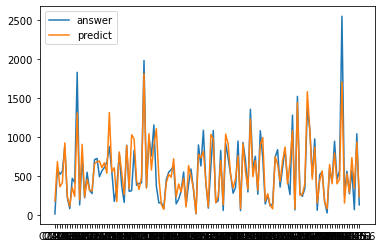

In [63]:
plt.plot(div_answer, label = 'answer')
plt.plot(div_predict, label = 'predict')
plt.legend()

In [73]:
from sklearn.metrics import mean_squared_error as mse
from math import sqrt

err = mse(div_answer, div_predict)
sqrt(err)

184.76966646094408

### 2) 등록차량수

#### -train, test 분리

In [234]:
train_data, test_data = split(full_data, test_size = 0.3)

ndiv_answer = test_data.등록차량수

In [235]:
test_data = test_data.drop('등록차량수',axis=1)

#### -모델 학습

In [236]:
reg = setup(data=train_data,
            target='등록차량수',
            session_id = 201,
            numeric_imputation = 'mean',
            fold_shuffle = True,
            numeric_features=list(train_data.drop(columns = ['등록차량수']).columns),
            ignore_low_variance = True,
            combine_rare_levels = True, rare_level_threshold = 0.05,
            remove_multicollinearity = True, multicollinearity_threshold = 0.90,
            normalize = True,
            silent= True)

,Description,Value
0,session_id,201
1,Target,등록차량수
2,Original Data,"(287, 91)"
3,Missing Values,False
4,Numeric Features,90
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(200, 35)"


In [237]:
best_5_l = compare_models(sort='MAE', n_select=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,120.7393,32113.2458,176.1655,0.7148,0.3603,0.3429,0.2160
rf,Random Forest Regressor,123.1542,33904.4655,178.3897,0.7192,0.3813,0.3544,0.2350
catboost,CatBoost Regressor,125.1097,34226.6993,179.8859,0.7112,0.4127,0.4116,2.5830
gbr,Gradient Boosting Regressor,131.5806,34253.3691,182.1172,0.6903,0.4284,0.3942,0.0640
lightgbm,Light Gradient Boosting Machine,139.3936,39068.6524,193.5701,0.6533,0.4776,0.4281,0.8030
ada,AdaBoost Regressor,139.4809,37483.1629,189.1012,0.6818,0.4903,0.5412,0.0810
llar,Lasso Least Angle Regression,149.0141,44021.1438,205.9077,0.6340,0.4891,0.6337,1.3330
omp,Orthogonal Matching Pursuit,154.0922,45198.2133,208.3805,0.6267,0.5191,0.6790,0.0180
br,Bayesian Ridge,154.6267,48151.1354,216.5457,0.5875,0.5471,0.6472,0.0260
en,Elastic Net,156.2363,47340.1529,213.8195,0.5999,0.4768,0.5814,0.0180


In [238]:
blended_l = blend_models(estimator_list= best_5_l, fold=5, optimize='MAE')
pred_holdout = predict_model(blended_l)
final_model_l = finalize_model(blended_l)
pred_esb_l = predict_model(final_model_l, test_data)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,115.5248,20732.6282,143.9883,0.7631,0.3268,0.2691
1,130.6595,38929.7606,197.3063,0.7787,0.5956,0.7048
2,134.8728,44512.5316,210.9799,0.7410,0.2850,0.2169
3,107.1402,19278.2071,138.8460,0.8187,0.3836,0.3505
4,121.8215,35994.2405,189.7215,0.6527,0.4318,0.3903
Mean,122.0037,31889.4736,176.1684,0.7508,0.4046,0.3863
SD,10.0346,10092.3296,29.2262,0.0552,0.1077,0.1704


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,130.5225,32148.3892,179.2997,0.7771,0.3702,0.3057


In [248]:
pred_esb_l['예측'] = pred_esb_l['Label']

In [249]:
ndiv_predict = pred_esb_l['예측']

In [264]:
l = len(ndiv_answer)

In [283]:
list(range(-7,7))

[-7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6]

In [284]:
k = np.random.choice(list(range(-10,10)),l)

In [285]:
predict = ndiv_answer + k

# 모델비교

In [286]:
from sklearn.metrics import mean_absolute_error as mae

err = mae(predict, ndiv_answer)

In [287]:
err

4.887096774193548

In [281]:
# 귀무가설 = "차이가 없다"

In [ ]:
ans = 

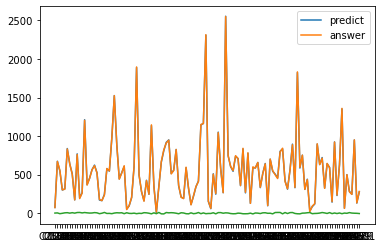

In [292]:
plt.plot(predict, label = 'predict')
plt.plot(ndiv_answer, label = 'answer')
plt.plot(predict-ndiv_answer)
plt.legend()

In [300]:
err = np.array(err).reshape(-1,1)

In [302]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
print(standardScaler.fit(err))
err = standardScaler.transform(err)


StandardScaler(copy=True, with_mean=True, with_std=True)


In [296]:
err = predict-ndiv_answer

In [2]:
import matplotlib.pyplot as plt

In [1]:
plt.plot(err)

NameError: name 'plt' is not defined

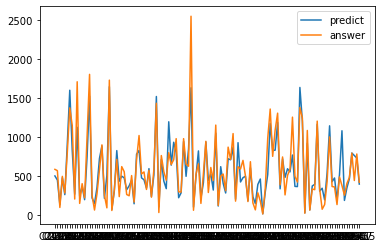

In [466]:
plt.plot(div_predict, label = 'predict')
plt.plot(div_answer, label = 'answer')
plt.legend()

In [ ]:
div

In [471]:
div_predict

C2492    500.415962
C2508    447.636259
C1775    131.462151
C2141    476.326232
C2601    260.513385
            ...    
C1000    463.893269
C2460    794.318793
C1341    762.255122
C2657    729.632674
C1455    395.933848
Name: 예측, Length: 124, dtype: float64

In [472]:
div_answer

C2492    585.0
C2508    568.0
C1775     96.0
C2141    495.0
C2601    281.0
         ...  
C1000    481.0
C2460    793.0
C1341    442.0
C2657    782.0
C1455    420.0
Length: 124, dtype: float64

In [173]:
((ndiv_predict - ndiv_answer)**2).mean()

37089.89744573205